# Predictive Power of Imbalance

## 1. Prediction Power of Imbalance on Futur Price Movements

In this notebook, we will study the relationship between Imblance and Price Movements which corresponds to the classical law of supply and demand.

The imbalance is defined 
$$Imb = \frac{Q_{ask}-Q_{bid}}{Q_{ask}+Q_{bid}}$$
where $Q_{bid}$ and $Q{ask}$ are volume of the bid/ask of the order book.

We compute for different horizons $h$ (between 1 and 10) the difference between between the current price and the futur price at horizon h in basis points (bps), which is : 

$$diff(h)=100\times100\times\frac{P_{t+h}-P_t}{P_t}$$
We would like to deduce the predictive power of $diff(h)$ with respect of the h values. We then study the relationship for different h. 

In [10]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
data_folder = "StockData/"
files = os.listdir(data_folder)
DATAS = {}
for f in files:
    df = pd.read_hdf(data_folder+f)
    DATAS[f.replace(".h5","").lower()] = pd.read_hdf(data_folder+f)
market = [market for market in DATAS]

We chose the order book of Total but we could choose any other orderbook of an asset. We also work on the year $2011$:

In [20]:
df_asset = DATAS["total"]
df_asset[df_asset.index.year == 2011]
df_asset.head()

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign,Imbalance,MidPrice,Imbalance_Cat,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8,diff_9,diff_10
Time,,,,,,,,,,,,,,,,,,,,
2011-01-03 09:00:01.988,40.19,70,40.01,40.19,660800,40700,1,-0.883963,40.1,"[-0.9, -0.8)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,15,40.01,40.19,660800,40700,1,-0.883963,40.1,"[-0.9, -0.8)",-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,67,40.01,40.19,660800,40700,1,-0.883963,40.1,"[-0.9, -0.8)",-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,20,40.01,40.19,660800,40700,1,-0.883963,40.1,"[-0.9, -0.8)",-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,250,40.01,40.19,660800,40700,1,-0.883963,40.1,"[-0.9, -0.8)",-0.0,-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_asset['Imbalance'] = ((df_asset.AskQty - df_asset.BidQty)/(df_asset.AskQty + df_asset.BidQty)).round(decimals = 1)
df_asset['Imbalance_Cat'] = pd.cut(df_asset.Imbalance, np.linspace(-1.0,1.0,21),right=False)
for h in range(1,11):
    df_asset['diff_'+str(h)] = - 100* 100 * df.TradedPrice.diff(periods=h) / df.TradedPrice
df_asset.head()

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign,Imbalance,MidPrice,Imbalance_Cat,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8,diff_9,diff_10
Time,,,,,,,,,,,,,,,,,,,,
2011-01-03 09:00:01.988,40.19,70,40.01,40.19,660800,40700,1,-0.9,40.1,"[-0.9, -0.8)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,15,40.01,40.19,660800,40700,1,-0.9,40.1,"[-0.9, -0.8)",-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,67,40.01,40.19,660800,40700,1,-0.9,40.1,"[-0.9, -0.8)",-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,20,40.01,40.19,660800,40700,1,-0.9,40.1,"[-0.9, -0.8)",-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,250,40.01,40.19,660800,40700,1,-0.9,40.1,"[-0.9, -0.8)",-0.0,-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/ly/ylvnx_l518x5nbt0ssvchqww0000gn/T/ipykernel_56542/932096145.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Y.append(df.groupby(['Imbalance_Cat'])['diff_'+str(h)].mean())


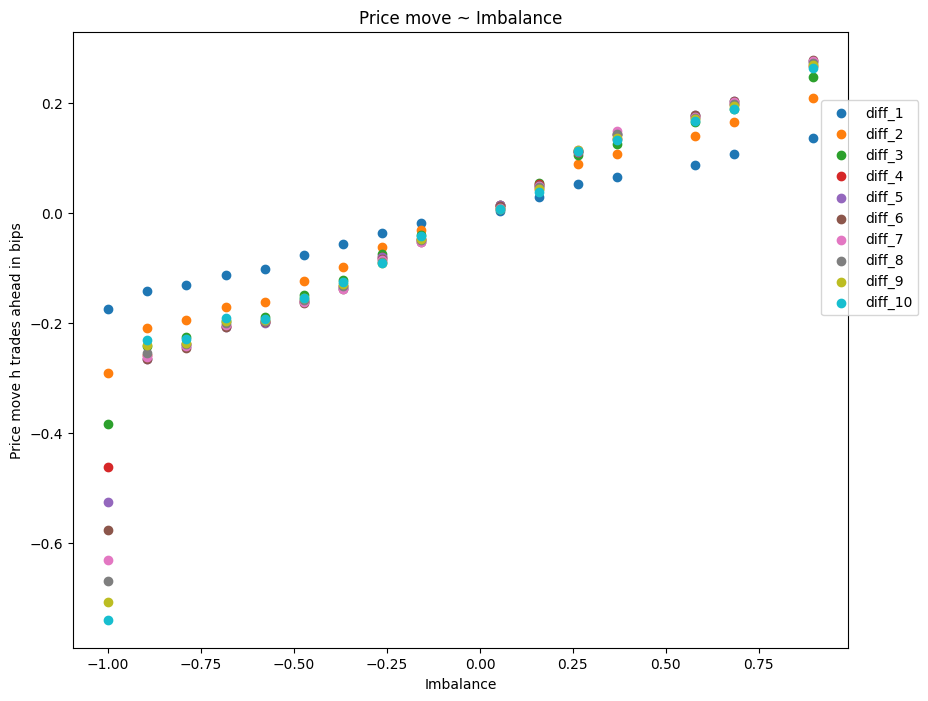

In [28]:
Y = []
for h in range(1,11):
    Y.append(df.groupby(['Imbalance_Cat'])['diff_'+str(h)].mean())
    plt.scatter(np.linspace(-1,1,20),Y[h-1], label = "diff_"+str(h))
plt.xlabel("Imbalance")
plt.ylabel("Price move h trades ahead in bips")
plt.legend(bbox_to_anchor=(1.1, 0.9))
plt.title("Price move ~ Imbalance")
plt.rcParams["figure.figsize"] = (10,8)

<font color='blue'>
L'imbalance permet de déterminer parfaitement le signe de la prochaine transaction. L'amplitude de la variation de prix est monotone en l'imbalance.
</font>

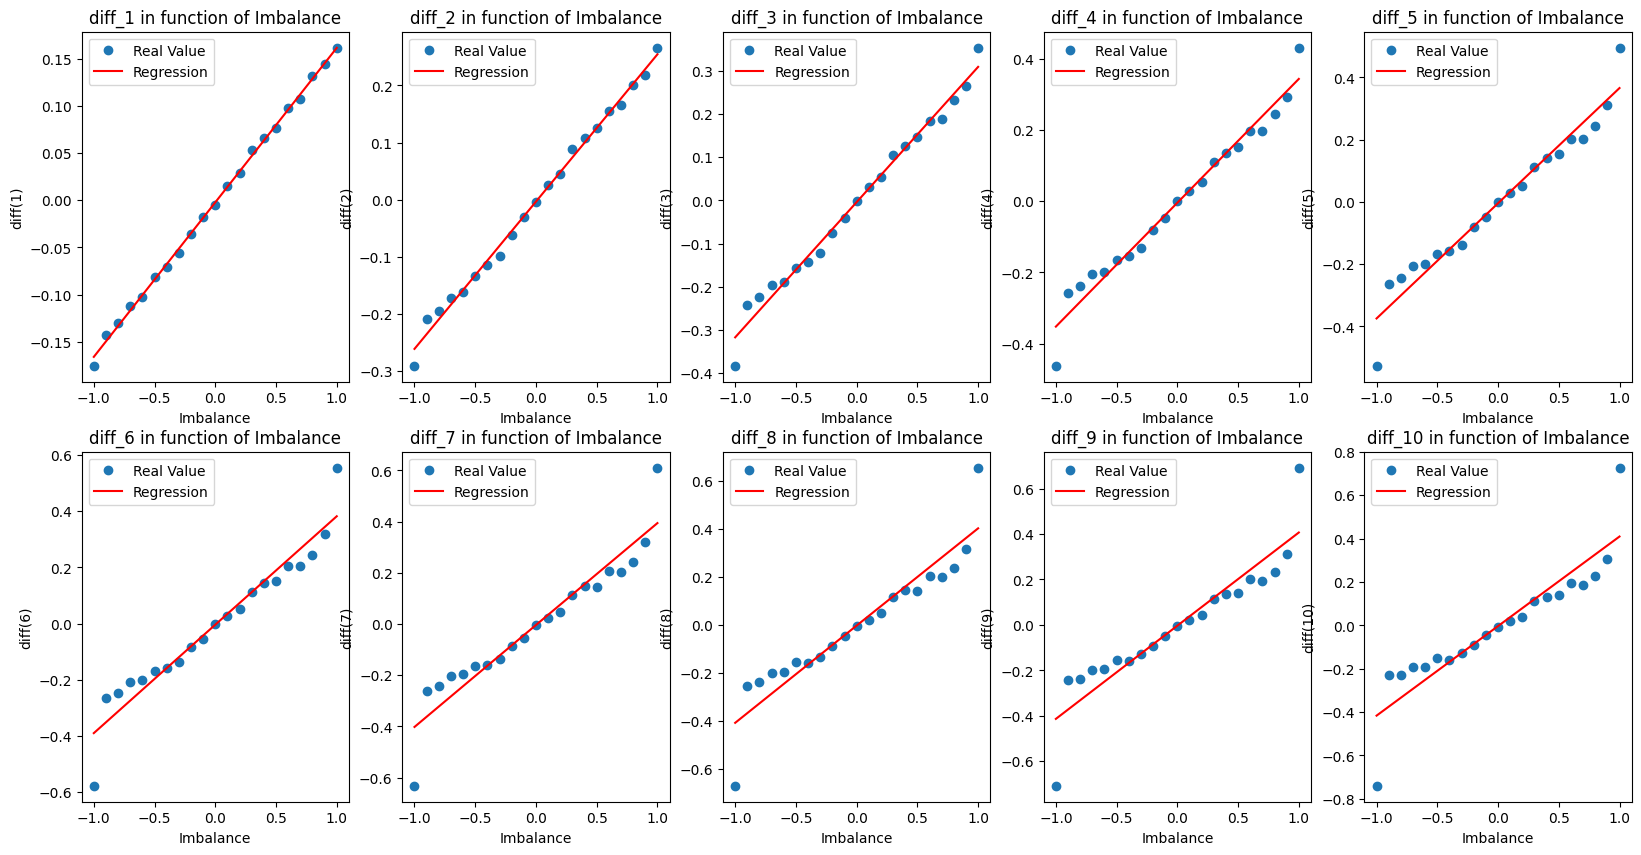

,h,score_r2
0,diff(1),0.998432
1,diff(2),0.994082
2,diff(3),0.984258
3,diff(4),0.967109
4,diff(5),0.946247
5,diff(6),0.923729
6,diff(7),0.895241
7,diff(8),0.870772
8,diff(9),0.845740
9,diff(10),0.820430


In [61]:
scores = {}


fig, axes = plt.subplots(2, 5, figsize=(20, 10))


for h in range(10):
    df_asset_group = df_asset.groupby('Imbalance')[f'diff_{h+1}'].mean()
    df_asset_group.plot(ax= axes[h//5][h%5], ylabel=f'diff({h+1})', label='Real Value', marker='o', linestyle='None')
    x = df_asset_group.index.to_numpy()
    y = df_asset_group.to_numpy()
    x = x.reshape(-1, 1)
    linear_regression = LinearRegression(fit_intercept=True).fit(x, y)
    y_predict = linear_regression.predict(x)
    axes[h//5][h%5].plot(x, y_predict, color='red', label='Regression')
    axes[h//5][h%5].legend()
    axes[h//5][h%5].set_title(f'diff_{h+1} in function of Imbalance')
    scores[f'diff({h+1})'] = linear_regression.score(x,y)

plt.show()

df_scores = pd.DataFrame(list(scores.items()), columns=['h', 'score_r2'])


df_scores

- We observe a strong linear relationship between Imbalance and futur price movement. However the more h increase the less the imbalance is lenearly dependant to the price movement.

- Moreover, we observe that if $Ask$(sellers) is big in comparison to $Bid$(buyers) then the price decreaser. Inversely, if the $Bid$ size increase then the price increase 

## 2. Améliorer le résultats précédent à l'aide de réseaux de neurones et de mémoire sur les signes des transactions

We now want to increase our result obtained with a Linear Regression using a Neural Network. For this we will try to add more features in order to have a better prediction for the NN. However we have to pay attention to not overfit our train data.

We will considering the following variables : 
- the sign of the last 10 transactions (TradedSign)
- the volume of the normalized transaction  by the Average Trading Size (ATS)
- the volume at the best $Bid$ and the best $Ask$

We want to predict using the 10 last transactions, the volumes at the best Bid/Ask, the normalized transaction volume and the imbalance, the futur increase ($diff(h)$) price using a MultiLayer Perceptron with $Pytorch$

### a. Import Pytorch

In [64]:
import torch
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim


### b. Créer un jeu d'entraîement et un jeu de test pour le modèle

Centrer et standardiser les variables et créer votre jeu d'entraînement et votre jeu de test.

In [65]:
df_asset_NN = df_asset.copy()

for h in range(1,11):
        df_asset_NN['LastTraded_'+str(h)] = df_asset_NN['TradedSign'].shift(k)

df_asset_NN.fillna(0, inplace = True)
df_asset_NN.head()


TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

In [ ]:
train, test = train_test_split(df_norm, test_size=0.2)
train

### c. Construire le réseaux de neurones

Construire le réseau de neurones. Vous pourrez commencer avec un basique (une couche d'entrée et une de sortie) pour voir les résultats, puis ajouter au fur et à mesure des couches cachées pour améliorer les résultats.

Vous pouvez utiliser l'API séquentielle de Keras : le modèle est défini avec la commande `keras.models.Sequential()` et les couches denses avec `keras.layers.Dense()`.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Compiler le modèle. Vous pouvez utiliser l'optimiseur `SGD` et l'erreur quadratique moyenne comme fonction de perte.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### d. Entraîner votre modèle sur le jeu d'entraînement

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

### e. Evaluer votre modèle sur le jeu d'entraînement

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### f. Evaluer votre modèle sur le jeu de test

In [ ]:
model.evaluate(test, test)

### g. Analyser de vos résultats

Regarder vos résultats pour différents horizons $h$ sur la prévisions de $\mbox{diff}(h)$ et les comparer avec les résultats de la section 1. en utilisant l'imbalance. Commenter.

Comment pourriez-vous améliorer ce résultat ?